## Intro

When Librosa loads an audio file, there is a default sample rate, which is the number of samples from the mp3's audio signal for one second. Therefore,
to get the length of a song in real time we take the length of the read-in array and divide by the sample rate for that audio sample.

In [52]:
import os
import glob
import warnings
import timeit

import matplotlib.pyplot as plt
import librosa
import torchaudio

warnings.filterwarnings("ignore", category=UserWarning)

In [57]:
audio_dir = './data/fma_small/'
# audio_dir = './data/fma_small/108/'

The next code chunk is Super handy function that just searches for every mp3 file within the audio directory. 
My audio folder has a bunch of subfolders like '000', '099', etc, and the audio files are
one level further down.

In [60]:
filepaths = glob.glob(os.path.join(audio_dir, '***/*.mp3'))

Here is what a typical load looks like. Specifying `sr=None` ensures that the file's default sample-rate is preserved. 
We can also specify the duration with `librosa.load`.

In [67]:
example_source, sr = librosa.load(filepaths[0], sr=None, duration=0.1)
librosa.get_duration(example_source, sr=sr)

0.1

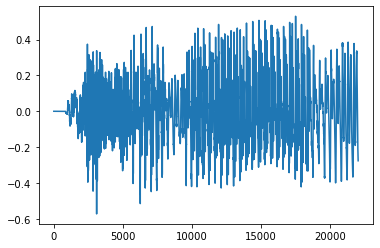

In [62]:
plt.plot(example_source)
plt.show()

## How long does a typical load take?

In [34]:
duration = 0.01

In [85]:
%%timeit

librosa.load(filepaths[0], sr=None, duration = 1)
# librosa.get_samplerate(filepaths[0])

129 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


On my linux virtual machine, one second of audio takes between 143 and 214 milliseconds to load one second of audio (down to 129 ms if we don't force a sample rate). 
Multiplying this number by 8 is about how long it will take to load the entire dataset in.

In [86]:
%%timeit 

torchaudio.info(filepaths[0])

253 µs ± 5.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


This runs a lot faster at 270 microseconds, so it will be a better tool to 
check for integrity.

## Check for integrity

This is the only point where I will use `torchaudio` for the `torchaudio.info` method. This method
tries to open the file without loading it into memory. This allows us to check
for corrupted mp3 files. 

In [63]:
bad_files = []
for file in filepaths:
    try:
        torchaudio.info(file)
    except RuntimeError:
        bad_files.append(file)
bad_files

['./data/fma_small/108/108925.mp3',
 './data/fma_small/133/133297.mp3',
 './data/fma_small/099/099134.mp3']

Next up: remove these filepaths from the files list and we are set!

Possible issue: length of time to load in, as well as memory constaint.

In [76]:
# Estimating the memory all files will take
example_source, sr = librosa.load(filepaths[0], sr=8000, duration=2)
# (example_source.nbytes/10**6) * 8000 # megabytes
(example_source.nbytes/10**9) * 8000 # gigabytes

0.512